In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, log_loss
from sklearn.metrics import RocCurveDisplay

In [3]:
df = pd.read_csv('winequalityN.csv')

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


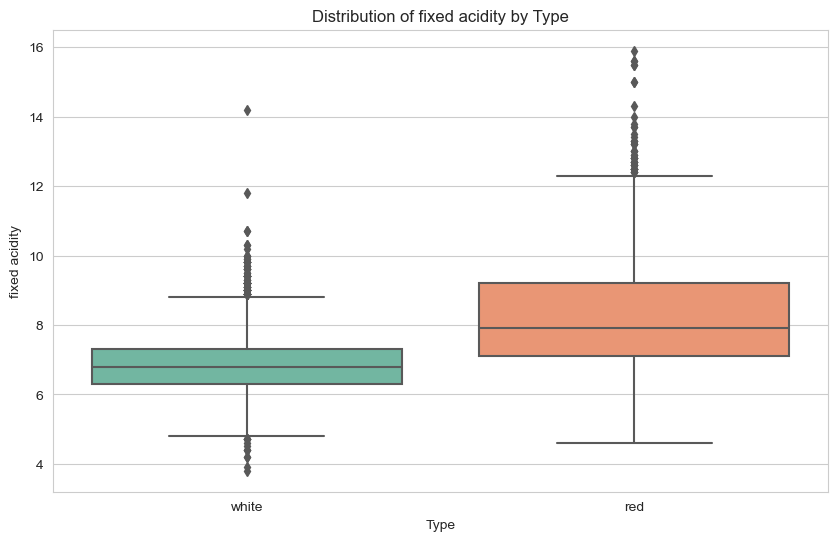

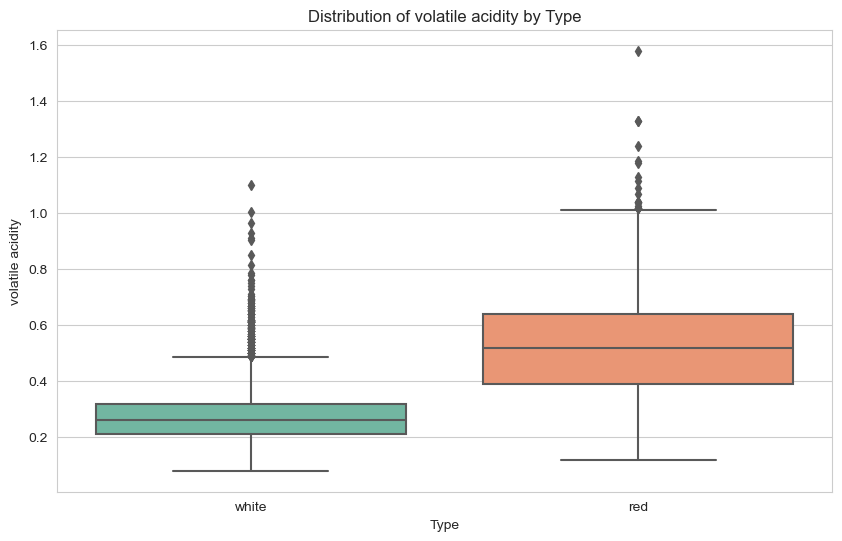

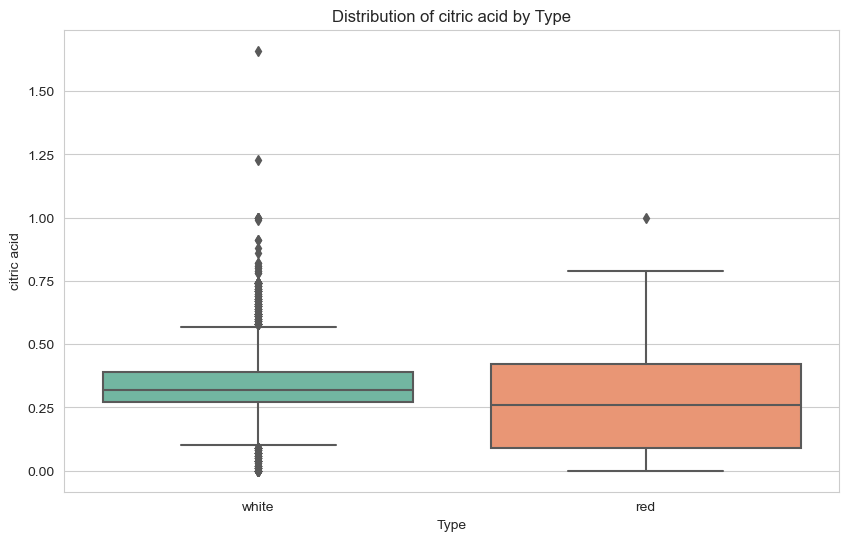

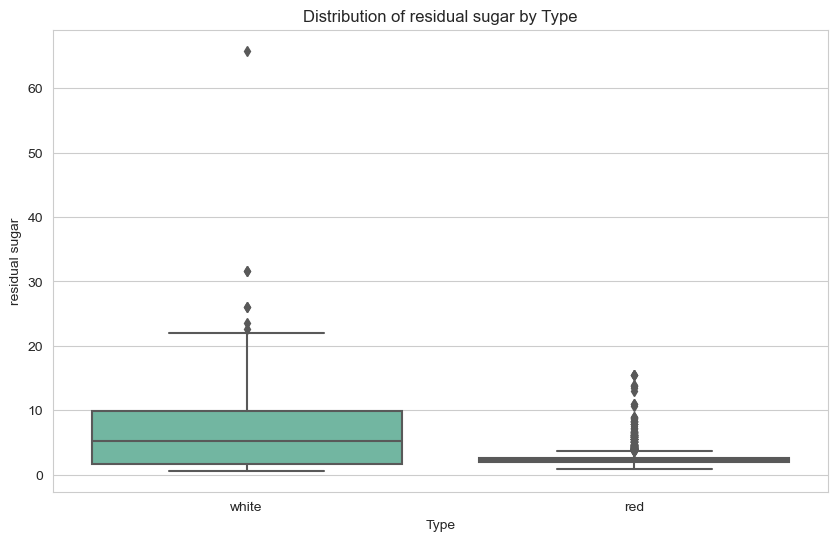

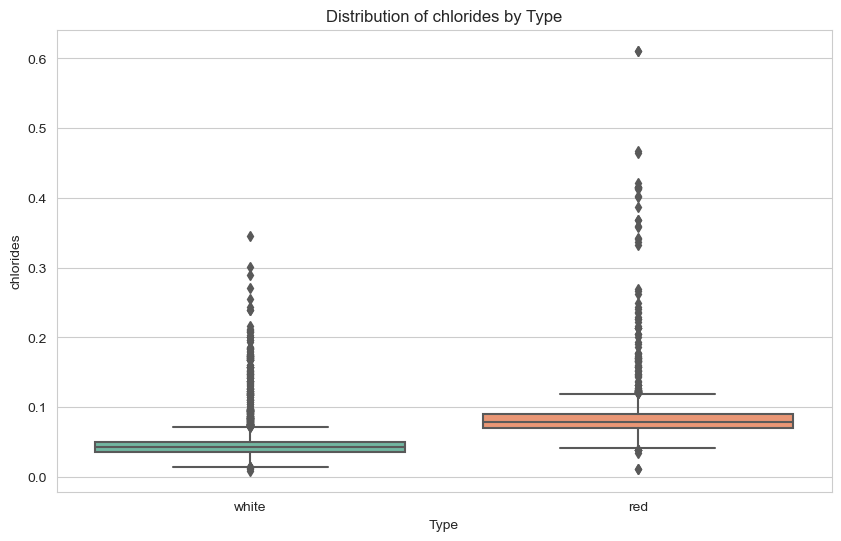

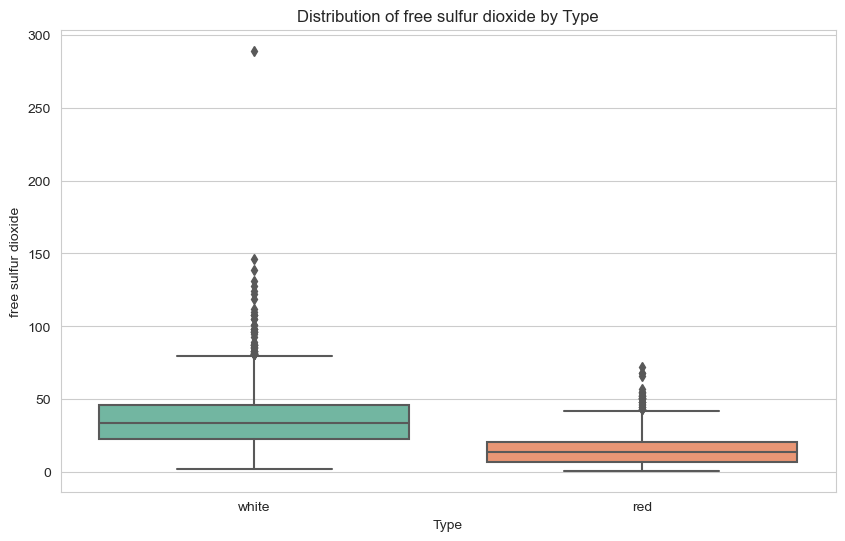

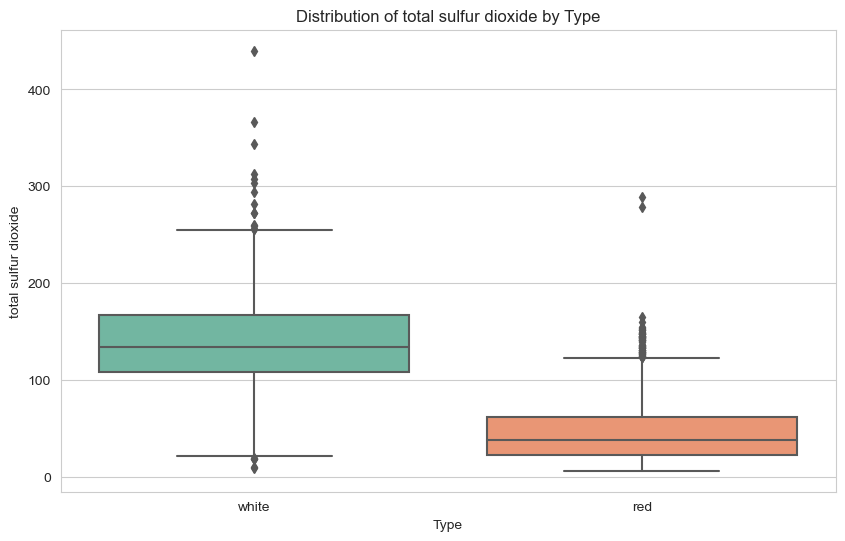

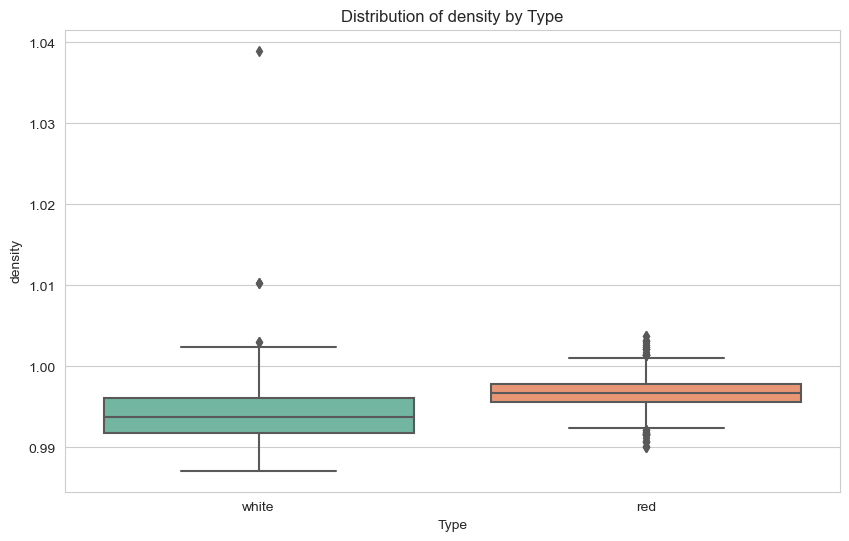

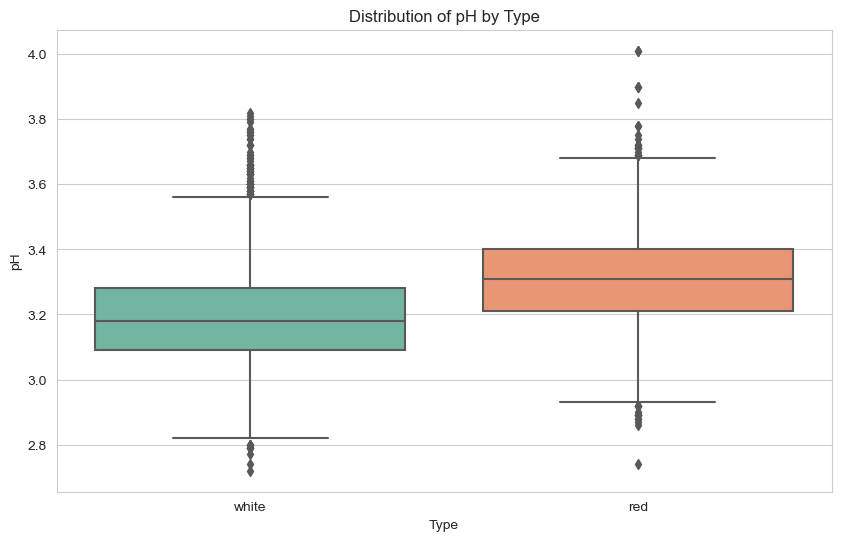

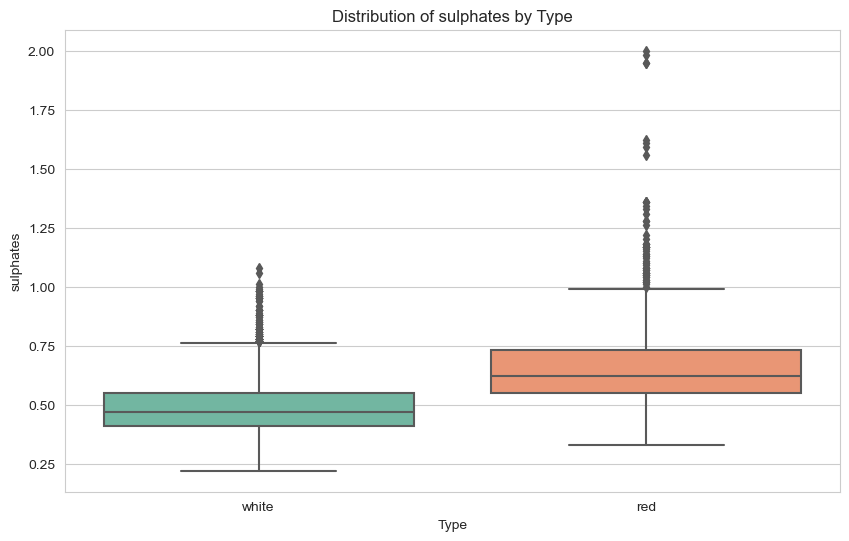

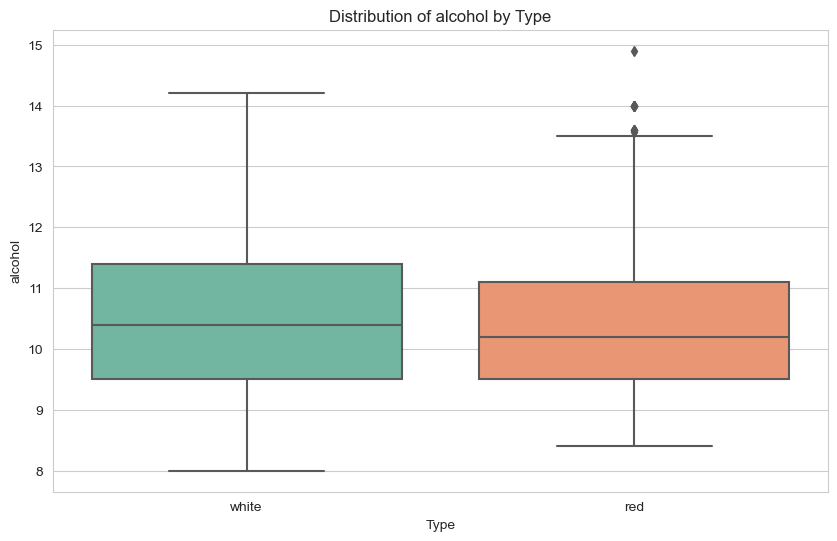

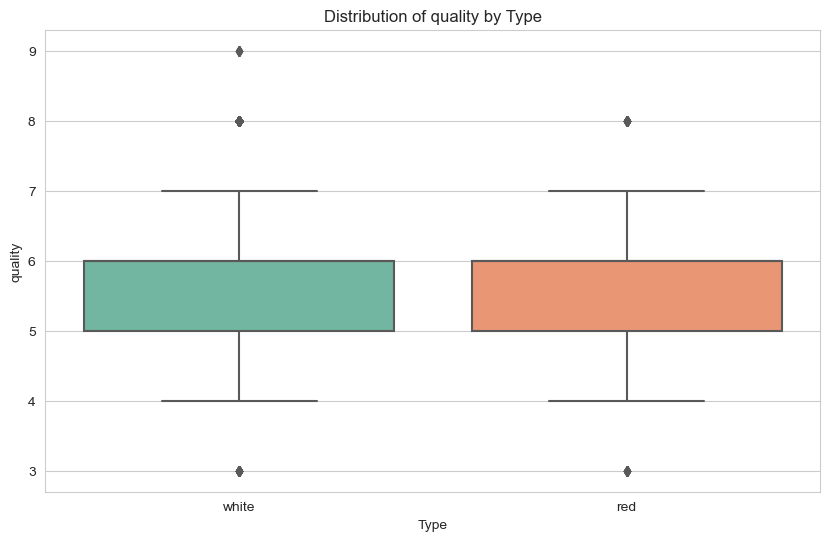

In [5]:
sns.set_style("whitegrid")

characteristics = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                   'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for char in characteristics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y=char, data=df, palette='Set2')
    plt.title(f'Distribution of {char} by Type')
    plt.xlabel('Type')
    plt.ylabel(char)
    plt.show()


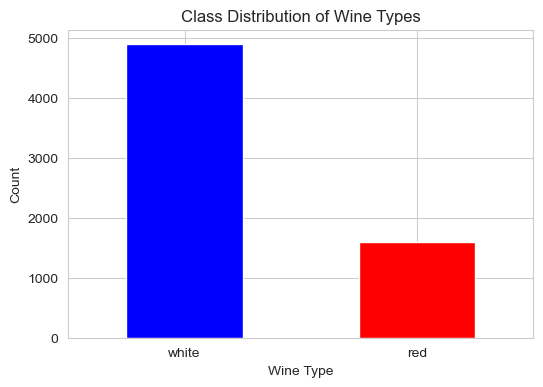

Class Distribution:
type
white    4898
red      1599
Name: count, dtype: int64


In [6]:
class_distribution = df['type'].value_counts()

plt.figure(figsize=(6, 4))

class_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Class Distribution:")
print(class_distribution)

In [7]:
# So now we can give a mark that our model is unbalanced classification problem or in other words dataset

In [8]:
# Normalize data

df.dropna(inplace=True)
class_distribution = df['type'].value_counts()
class_distribution.value_counts()

count
4870    1
1593    1
Name: count, dtype: int64

In [9]:
# Next step train model and make a prediction

X = df.drop(columns=['type'])  # Features
y = df['type']  # Target variable, our vine color red or white
y = df['type'].replace({'red': True, 'white': False})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Train Logistic Regression model
model = LogisticRegression(max_iter=10000) 
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# for y we have TPR and for x - FPR
# so basically we have how many TPR we have for some number of FPR
roc_score = roc_auc_score(y_test, y_pred)

# Assuming red is positive class
precision = precision_score(y_test, y_pred, pos_label=True)  
recall = recall_score(y_test, y_pred, pos_label=True)

logloss = log_loss(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

svm_model.fit(X_train, y_train)

svm_score = svm_model.score(X_test, y_test)


# Print results
# 1 - best
# 0.5 random
print("ROC Score:", roc_score)

# TP / (TP + FN) ability to locate needed class between others
# 1 - best
print("Precision:", precision)

# Повнота, demonstrate ability to locate needed class
# 1 - best
print("Recall:", recall)

# If simple,  L(y|q)= -y log(q) - (1-y) log(q-1)
# 0 - is best
print("Log Loss:", logloss)

# If simple,  L(y|q)= y * sqrt((1-q)/q) - (1-y) sqrt(q/(1-q))
# print("AdaBoost Score:", ada_score)

print("\nConfusion Matrix:")
# TP  FP
# FN  TN
print(confusion_matrix(y_test, y_pred))

ROC Score: 0.9712396134848288
Precision: 0.9846491228070176
Recall: 0.9472573839662447
Log Loss: 0.5948411080204999

SVM Score: 0.9334708612686952
AdaBoost Score: 0.9927797833935018

Confusion Matrix:
[[1458    7]
 [  25  449]]


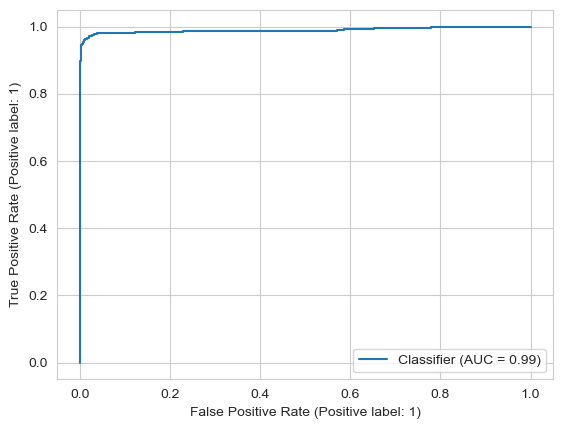

<Figure size 800x600 with 0 Axes>

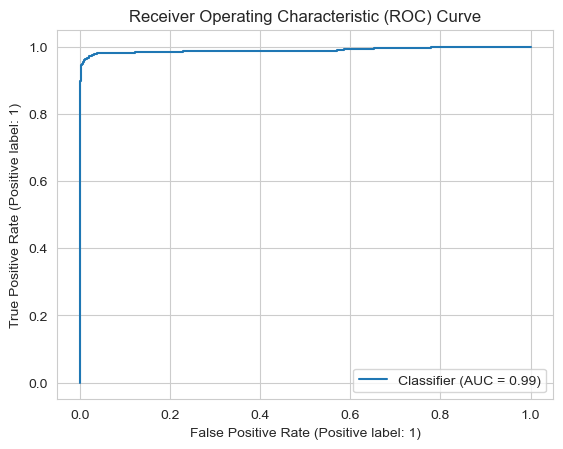

In [10]:
# ROC plot

y_scores = model.predict_proba(X_test)[:, 1] # probability it belongs to positive class

roc_display = RocCurveDisplay.from_predictions(y_test, y_scores)

plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [11]:
#!pip install tensorflow
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# Basically supere easy neural network with one input sliced into 64 nodes that then goes to one output node
model = keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# optimizer -updates the weights (how to do so)
# loss- basically our fitness function
# 
# adam - modified gradient
# binary_crossentropy - if simple ->  L(y|q)= -y log(q) - (1-y) log(q-1)
# 0 - is best 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_classic = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

y_pred_classic = model.predict(X_test)
classic_loss_value = model.evaluate(X_test, y_test)
# use round as we dont need probability but class value 0 or 1
classic_conf_matrix = confusion_matrix(y_test, y_pred_classic.round())


# FOCAL LOSS


# Compile the model with focal loss
def focal_loss(y_true, y_pred, gamma=2.0, alpha=0.25):
    ce_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False)
    pt = tf.exp(-ce_loss)
    focal_loss = alpha * ((1 - pt) ** gamma) * ce_loss
    return focal_loss

model.compile(optimizer='adam', loss=focal_loss, metrics=['accuracy'])

# Train the model with focal loss
history_focal = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model with focal loss on test data
y_pred_focal = model.predict(X_test)
focal_loss_value = model.evaluate(X_test, y_test)
focal_conf_matrix = confusion_matrix(y_test, y_pred_focal.round())





Epoch 1/5


142/142 [==============================] - 3s 6ms/step - loss: 0.4205 - accuracy: 0.8906 - val_loss: 0.2066 - val_accuracy: 0.9252
Epoch 2/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1660 - accuracy: 0.9416 - val_loss: 0.1790 - val_accuracy: 0.9386
Epoch 3/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9447 - val_loss: 0.1560 - val_accuracy: 0.9458
Epoch 4/5
142/142 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.9498 - val_loss: 0.1488 - val_accuracy: 0.9479
Epoch 5/5
61/61 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9438
Epoch 1/10
142/142 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9604 - val_loss: 0.0123 - val_accuracy: 0.9551
Epoch 2/10
142/142 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9660 - val_loss: 0.0095 - val_accuracy: 0.9701
Epoch 3/10
142/142 [==============================

In [12]:

# Print and compare the results
print("Classic Binary Cross-Entropy Loss and Accuracy:")
print(classic_loss_value)
print(classification_report(y_test, (y_pred_classic > 0.5).astype(int)))
print("\nClassic Confusion Matrix:")
# TP  FP
# FN  TN
print(classic_conf_matrix)

print("\n\n\nFocal Loss and Accuracy:")
print(focal_loss_value)
print(classification_report(y_test, (y_pred_focal > 0.5).astype(int)))
print("\nFocal Confusion Matrix:")
# TP  FP
# FN  TN
print(focal_conf_matrix)

Classic Binary Cross-Entropy Loss and Accuracy:
[0.15939080715179443, 0.9437854290008545]
              precision    recall  f1-score   support

       False       0.94      0.99      0.96      1465
        True       0.96      0.81      0.88       474

    accuracy                           0.94      1939
   macro avg       0.95      0.90      0.92      1939
weighted avg       0.94      0.94      0.94      1939


Classic Confusion Matrix:
[[1447   18]
 [  91  383]]



Focal Loss and Accuracy:
[0.009140927344560623, 0.9695719480514526]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      1465
        True       0.98      0.90      0.94       474

    accuracy                           0.97      1939
   macro avg       0.97      0.94      0.96      1939
weighted avg       0.97      0.97      0.97      1939


Focal Confusion Matrix:
[[1455   10]
 [  49  425]]


In [13]:
# Part 4

In [14]:
dfi = pd.read_csv('IRIS.csv')

In [16]:
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


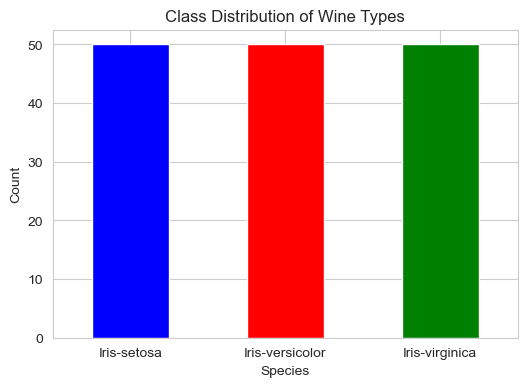

Class Distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [18]:
class_distribution = dfi['species'].value_counts()

plt.figure(figsize=(6, 4))

class_distribution.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Class Distribution of Wine Types')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("Class Distribution:")
print(class_distribution)

In [ ]:
# So we have equal distribution

In [62]:
# Next step train model and make a prediction

X = dfi.drop(columns=['species'])
y = dfi['species']

permutations = [[True, False, False], [False, True, False], [False, False, True]]

models = []

roc_scores = []
precisions = []
recalls = []
logloses = []
svm_scores = []
confusion_matrises = []

def evaluate_scores(arr):

    y = dfi['species'].replace({'Iris-setosa': arr[0], 'Iris-versicolor': arr[1], 'Iris-virginica': arr[2]})

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    model = LogisticRegression(max_iter=10000) 
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # for y we have TPR and for x - FPR
    # so basically we have -> how many TPR we have for some number of FPR
    roc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=True)  
    recall = recall_score(y_test, y_pred, pos_label=True)
    logloss = log_loss(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    models.append(model)
    
    roc_scores.append(roc_score)
    precisions.append(precision)
    recalls.append(recall)
    logloses.append(logloss)
    svm_scores.append(conf_matrix)
    confusion_matrises.append(conf_matrix)

def print_results(index):
    # Print results
    # 1 - best
    # 0.5 random
    print("ROC Score:", roc_scores[index])

    # TP / (TP + FN) ability to locate needed class between others
    # 1 - best
    print("Precision:", precisions[index])

    # Повнота, demonstrate ability to locate needed class
    # 1 - best
    print("Recall:", recalls[index])

    # If simple,  L(y|q)= -y log(q) - (1-y) log(q-1)
    # 0 - is best
    print("Log Loss:", logloses[index])

    print("\nConfusion Matrix:")
    # TP  FP
    # FN  TN
    print(confusion_matrises[index])
    
    print("\n" * 3)


In [63]:
for permutation in permutations:
    evaluate_scores(permutation)

In [64]:
for index in range(0, 3):
    print_results(index)

ROC Score: 1.0
Precision: 1.0
Recall: 1.0
Log Loss: 2.2204460492503136e-16

Confusion Matrix:
[[29  0]
 [ 0 16]]




ROC Score: 0.5648148148148149
Precision: 0.75
Recall: 0.16666666666666666
Log Loss: 12.815521205019433

Confusion Matrix:
[[26  1]
 [15  3]]




ROC Score: 0.9852941176470588
Precision: 0.9166666666666666
Recall: 1.0
Log Loss: 0.8009700753137147

Confusion Matrix:
[[33  1]
 [ 0 11]]






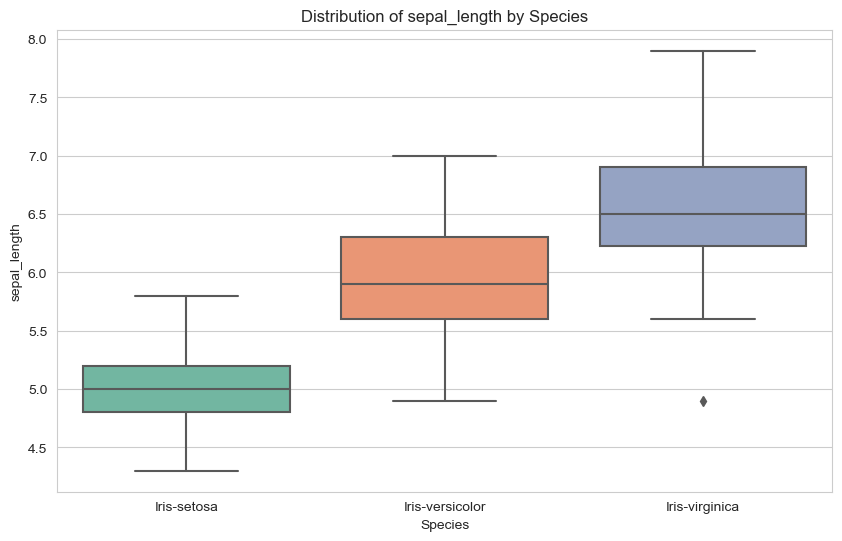

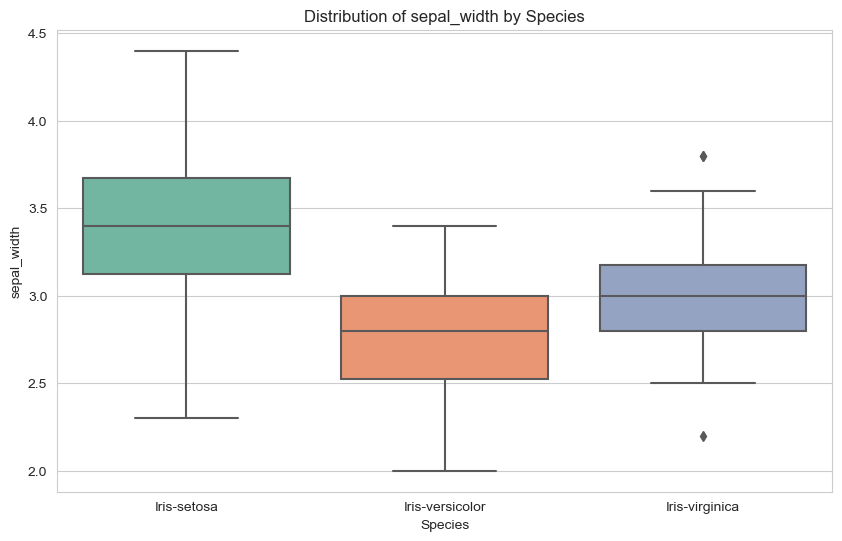

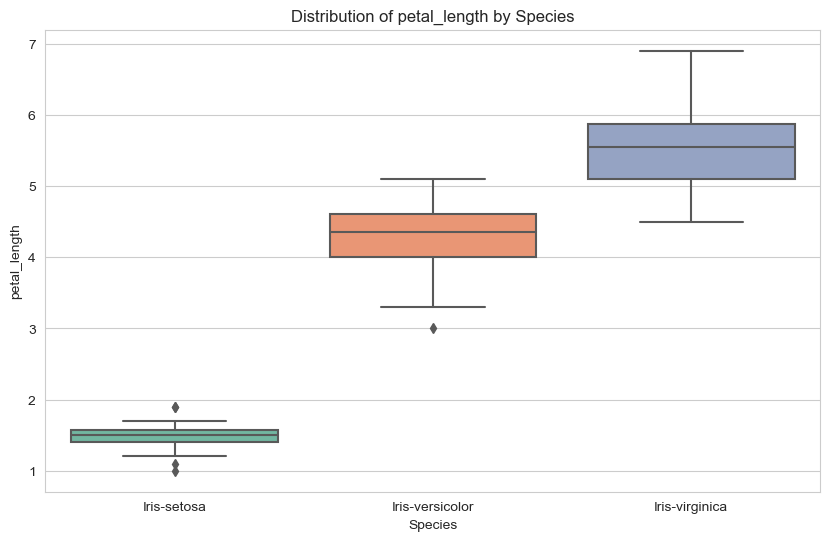

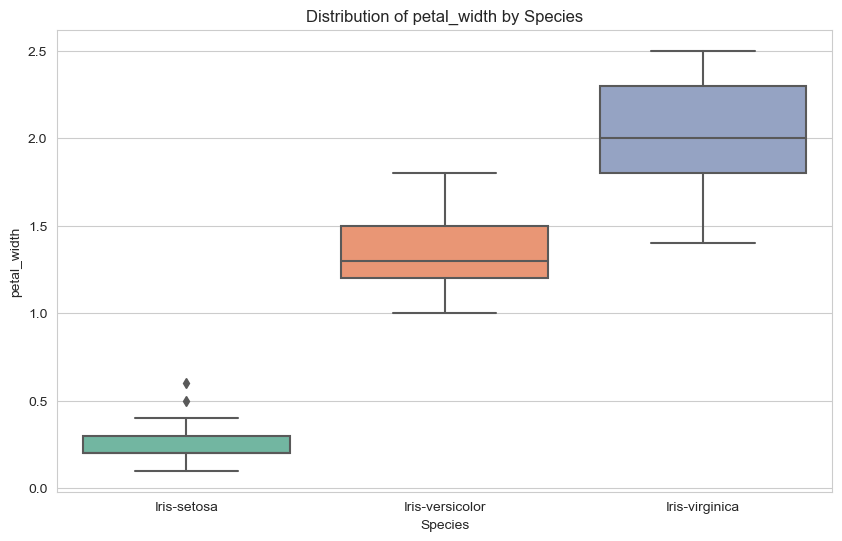

In [66]:
characteristics = dfi.columns[:-1]  # Exclude the species col

sns.set_style("whitegrid")

for char in characteristics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='species', y=char, data=dfi, palette='Set2')
    plt.title(f'Distribution of {char} by Species')
    plt.xlabel('Species')
    plt.ylabel(char)
    plt.show()